In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import ast
%matplotlib inline

In [9]:
plt.style.use("ggplot")

In [5]:
articles = pd.read_csv("../dataset/articles_with_cluster_labels.csv")

In [6]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], int(point['val']),fontsize=14)

In [22]:
umap_labels = articles['cluster_label']
umap_X = articles["embedding_X"]
umap_Y = articles["embedding_Y"]

In [26]:
mean_values_embedded = articles[["cluster_label","embedding_X","embedding_Y"]].\
            groupby("cluster_label").\
            agg({"embedding_X":["mean","std"],"embedding_Y":["mean","std"]}).\
            reset_index()

x_centroids = mean_values_embedded["embedding_X"]["mean"]
y_centroids = mean_values_embedded["embedding_Y"]["mean"]
centroid_labels = mean_values_embedded["cluster_label"]

In [33]:
deviations = (mean_values_embedded["embedding_X"]["std"] + mean_values_embedded["embedding_Y"]["std"])/2

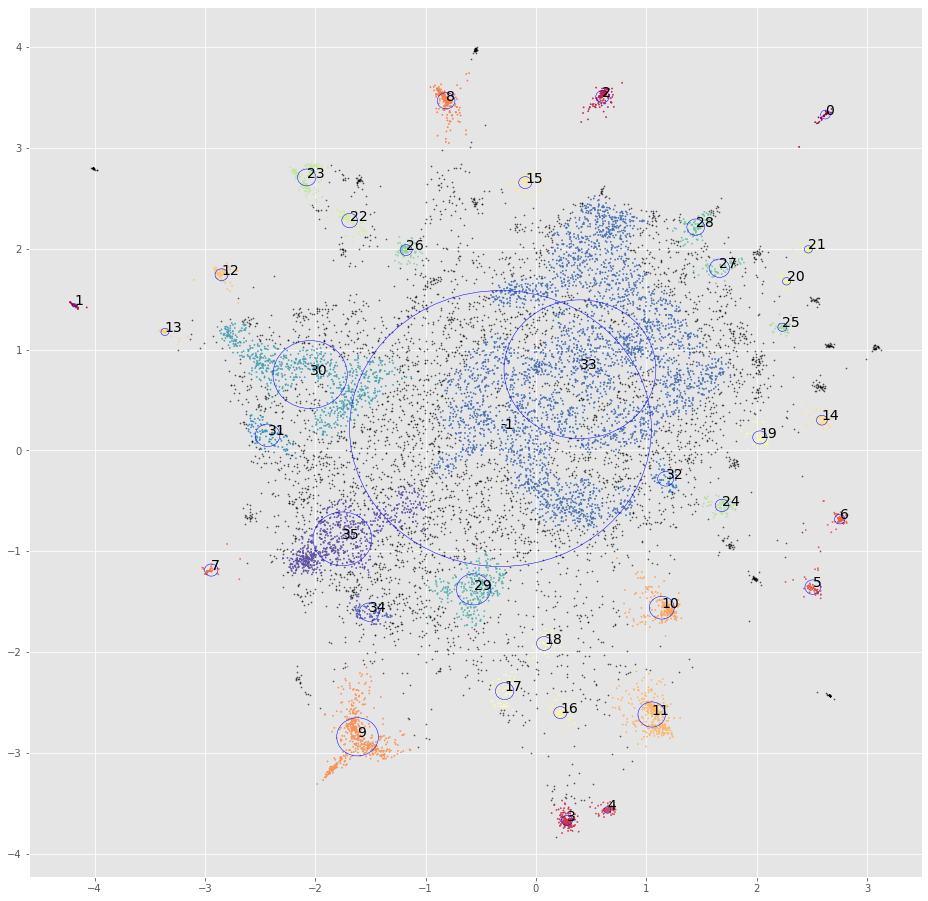

In [34]:
clustered = (umap_labels.values >= 0)
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)


ax.scatter(umap_X[~clustered],
            umap_Y[~clustered],
            c=(0, 0, 0),
            s=1.5,
            alpha=0.5)
ax.scatter(umap_X[clustered],
            umap_Y[clustered],
            c=umap_labels[clustered],
            s=1.5,
            cmap='Spectral');

label_point(x_centroids,y_centroids,centroid_labels,ax)

for (x,y,z) in zip(x_centroids,y_centroids,deviations):
    c1 = plt.Circle((x, y), z, color='b', fill=False)
    ax.add_artist(c1)

In [35]:
def common_keyphrases_per_cluster(df,n_most_common=10):
    
    for cluster_label in pd.unique(df['cluster_label']):
        
        print("MOST COMMON PHRASES IN CLUSTER {}".format(cluster_label))
        
        cluster_fname = "%02d_cluster.csv" %cluster_label
        
        cluster = df[df["cluster_label"]==cluster_label]
        
        cluster['key_phrases'] = cluster['key_phrases'].apply(lambda x: ast.literal_eval(x))
        
        exploded_phrases = cluster[["key_phrases","total_chars"]].explode("key_phrases")
        
        most_common_phrases = exploded_phrases.groupby("key_phrases").\
                count().\
                reset_index().\
                sort_values(by="total_chars",ascending=False).\
                rename(columns={"total_chars":"total_mentions"})
        
        limit_common_phrases = most_common_phrases[most_common_phrases["total_mentions"]>=n_most_common].reset_index(drop=True)
        limit_common_phrases.to_csv(cluster_fname,index=False)
        print(limit_common_phrases.iloc[:20])

In [36]:
common_keyphrases_per_cluster(articles)

MOST COMMON PHRASES IN CLUSTER 16


/Users/rmartinshort/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


                      key_phrases  total_mentions
0                          ang ii              32
1             converting enzyme 2              31
2                  angiotensin ii              25
3                         table 1              25
4              angiotensin system              25
5                   ace2 activity              24
6                          usa ).              23
7                  important role              22
8               converting enzyme              22
9                  blood pressure              21
10                       ang -( 1              20
11               previous studies              20
12                ace2 expression              19
13  angiotensin converting enzyme              18
14                   data suggest              18
15        significantly increased              17
16                           7 ),              17
17                  heart failure              17
18             protein expression              17


/Users/rmartinshort/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


                          key_phrases  total_mentions
0                             table 1            2226
1                             table 2            1380
2                            figure 1             933
3                             table 3             909
4                    previous studies             904
5                              usa ).             869
6                      important role             830
7                            shown ).             825
8                       present study             815
9   severe acute respiratory syndrome             810
10               previously described             797
11                        figure 1 ).             766
12                           figure 2             762
13                               1 ).             708
14                         table 1 ).             702
15                   room temperature             684
16                    performed using             682
17                     infec